# 데이터 준비

In [21]:
import pandas as pd
gt_raw=pd.read_csv("/root/filtered_gene_expression_10.csv",index_col=0)

In [22]:
adj_matrix=pd.read_csv("/root/adj_matrix.csv",index_col=0)

In [23]:
import numpy as np
samples = gt_raw.index

def get_label(s):
    if s.startswith("GTEX"):
        return 0 #normal
    if s.startswith("TCGA"):
        code = s.split("-")[3][:2]
        if code == "01":
            return 1 #normal
        elif code == "11":
            return 0 #normal
    return np.NaN #other

labels = [get_label(s) for s in samples]

label_df = pd.DataFrame({"sample": samples, "label": labels}).set_index(keys='sample')

In [24]:
expr_withlabel=pd.concat([gt_raw[list(set(adj_matrix.columns)&set(gt_raw.columns))],label_df],axis=1)

In [25]:
adj=adj_matrix[list(set(adj_matrix.columns)&set(gt_raw.columns))].T[list(set(adj_matrix.columns)&set(gt_raw.columns))]

In [26]:
expr_withlabel

,LGI1,BPIFB2,CKMT1B,IGKV3D-20,IGLV3-21,IGLV3-25,CASP14,CA5A,KCNJ9,PPBP,...,ABCB5,TRAV8-4,LRP2,DSC3,LCE1C,CFC1,SLCO1B3,SOST,ALAS2,label
GTEX-S4Q7-0003-SM-3NM8M,-5.5735,-4.6082,-3.8160,-9.9658,-3.0469,-9.9658,-2.7274,-9.9658,-5.5735,-9.9658,...,-9.9658,-9.9658,-5.0116,-1.3921,-2.2447,-9.9658,-9.9658,-9.9658,-3.3076,0.0
TCGA-19-1787-01,3.7667,-9.9658,2.5188,-9.9658,1.1316,0.0300,-9.9658,-0.2671,1.4756,-1.5105,...,-1.8836,-9.9658,1.9786,-9.9658,-9.9658,-3.3076,-6.5064,-9.9658,-9.9658,1.0
TCGA-S9-A7J2-01,3.0252,1.7185,4.2465,-9.9658,-9.9658,-9.9658,-9.9658,0.0014,4.4542,-1.9942,...,-9.9658,-9.9658,-3.1714,-9.9658,-9.9658,-5.0116,-9.9658,-9.9658,-9.9658,1.0
GTEX-QV31-1626-SM-2S1QC,1.1641,-9.9658,-2.1140,-9.9658,-2.1140,-9.9658,-2.1140,-9.9658,-2.9324,-2.4659,...,-9.9658,-9.9658,-4.2934,0.5568,-2.2447,-9.9658,-9.9658,0.6425,-1.9942,0.0
TCGA-G3-A3CH-11,-5.0116,-2.6349,-2.8262,0.2400,2.9929,3.0020,-9.9658,4.3242,-9.9658,-1.2142,...,-9.9658,-2.7274,-5.5735,-9.9658,-9.9658,-9.9658,6.5615,-9.9658,-4.2934,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-11ZTS-3326-SM-5LU9Y,1.9786,-1.3921,3.6994,0.6608,1.5758,4.5466,-3.4580,-6.5064,0.2881,-1.1811,...,-9.9658,-9.9658,-1.5105,-4.2934,-9.9658,5.9062,-5.5735,2.6602,0.3115,0.0
GTEX-VJYA-0726-SM-4KL1T,-1.0559,-9.9658,5.9043,-1.2828,2.3508,2.4171,-4.0350,-9.9658,-4.6082,-9.9658,...,-3.4580,-9.9658,-9.9658,6.3165,-0.0877,-4.0350,-9.9658,-9.9658,-5.0116,0.0
GTEX-ZA64-2126-SM-5Q5A8,3.9327,-3.0469,-2.3884,-9.9658,-1.4305,-9.9658,-9.9658,-9.9658,-4.6082,-0.0574,...,-3.8160,-9.9658,-9.9658,0.4967,-3.1714,-9.9658,0.5170,-2.2447,0.9191,0.0
GTEX-Q2AG-2826-SM-2HMJQ,5.7043,-4.6082,9.1036,-9.9658,-9.9658,-1.5951,-2.8262,-2.9324,6.6158,-2.9324,...,-1.8314,-9.9658,2.5462,-4.2934,-1.1811,2.1766,-9.9658,-9.9658,-0.4325,0.0


In [27]:
from sklearn.utils import resample
expr = expr_withlabel.drop(columns=['label'])
labels = expr_withlabel['label'].values

# 클래스별 인덱스 추출
tumor_idx = np.where(labels == 1)[0]
normal_idx = np.where(labels == 0)[0]

# Normal 클래스 크기에 맞춰 Tumor downsampling
n_samples = len(normal_idx)
down_tumor_idx = resample(tumor_idx, replace=False, n_samples=n_samples, random_state=42)

# Balanced dataset
balanced_idx = np.concatenate([normal_idx, down_tumor_idx])
np.random.shuffle(balanced_idx)

expr_balanced = expr.iloc[balanced_idx].values
labels_balanced = labels[balanced_idx]

# randomForest

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 예시: 이미 df가 로드되어 있다고 가정
# df = pd.read_csv("your_file.csv", index_col=0)


# train/test split (예: 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    expr_balanced, labels_balanced, test_size=0.3, random_state=42, stratify=labels_balanced
)

# RandomForestClassifier 학습
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 예측
y_pred = rf.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9898278560250391

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2556
         1.0       0.98      0.99      0.99      2556

    accuracy                           0.99      5112
   macro avg       0.99      0.99      0.99      5112
weighted avg       0.99      0.99      0.99      5112



<Figure size 500x500 with 0 Axes>

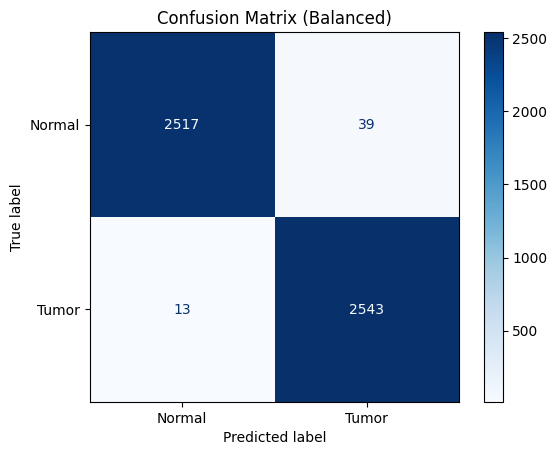

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# =====================
# 7️⃣ Confusion Matrix 시각화
# =====================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Tumor"])

plt.figure(figsize=(5, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Balanced)")
plt.show()


# decision tree

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    expr_balanced, labels_balanced, test_size=0.3, random_state=42, stratify=labels_balanced
)

# Decision Tree 학습
dt = DecisionTreeClassifier(
    max_depth=None,   # 원하는 경우 깊이 제한 가능
    random_state=42
)
dt.fit(X_train, y_train)

# 예측
y_pred = dt.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 중요 feature 확인
feature_importances = pd.Series(dt.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("\nTop 10 important features:\n", feature_importances.head(10))


Accuracy: 0.9720266040688575

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      2556
         1.0       0.97      0.97      0.97      2556

    accuracy                           0.97      5112
   macro avg       0.97      0.97      0.97      5112
weighted avg       0.97      0.97      0.97      5112


Top 10 important features:
 MYL2     0.582338
MMP13    0.077498
GH1      0.070600
ADH1B    0.048656
NEK2     0.028310
KRT18    0.025009
MYBL2    0.014476
CLCA4    0.010529
NPPA     0.008962
PAK5     0.008952
dtype: float64


<Figure size 500x500 with 0 Axes>

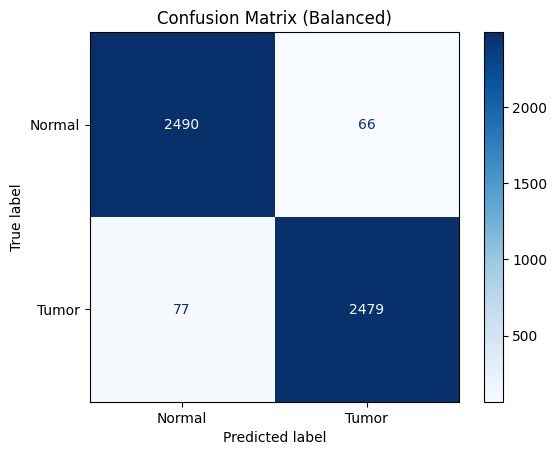

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# =====================
# 7️⃣ Confusion Matrix 시각화
# =====================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Tumor"])

plt.figure(figsize=(5, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Balanced)")
plt.show()


# xgboost

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    expr_balanced, labels_balanced,
    test_size=0.3,
    random_state=42,
    stratify=labels_balanced
)

# XGBoost 학습
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,       # 트리 깊이 조정 가능
    learning_rate=0.1, # 학습률
    subsample=0.8,     # 샘플링 비율
    colsample_bytree=0.8, # 피처 샘플링 비율
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_clf.fit(X_train, y_train)

# 예측
y_pred = xgb_clf.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:199: UserWarning: [08:49:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.99197965571205

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2556
         1.0       0.99      0.99      0.99      2556

    accuracy                           0.99      5112
   macro avg       0.99      0.99      0.99      5112
weighted avg       0.99      0.99      0.99      5112



<Figure size 500x500 with 0 Axes>

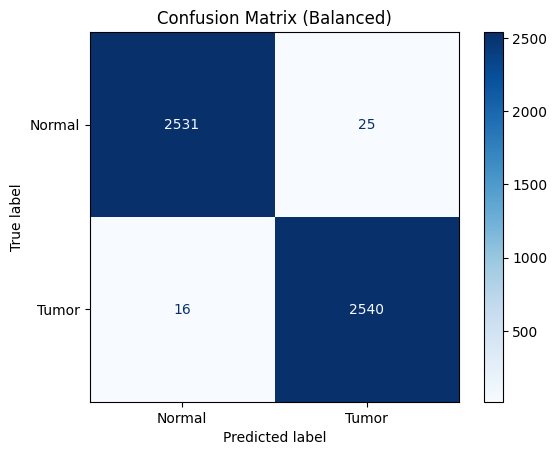

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# =====================
# 7️⃣ Confusion Matrix 시각화
# =====================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Tumor"])

plt.figure(figsize=(5, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Balanced)")
plt.show()


# SVM

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    expr_balanced, labels_balanced,
    test_size=0.3,
    random_state=42,
    stratify=labels_balanced
)

# feature 스케일링 (SVM은 스케일링 필요)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM 학습
svm_clf = SVC(
    kernel='rbf',   # RBF 커널, 필요시 'linear' 등 선택 가능
    C=1.0,          # 정규화 파라미터
    gamma='scale',  # gamma 설정
    random_state=42
)
svm_clf.fit(X_train_scaled, y_train)

# 예측
y_pred = svm_clf.predict(X_test_scaled)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 중요 feature 확인 (SVM은 직접 feature_importances_ 없음)
# 대신 coef_는 linear kernel일 때만 가능
if svm_clf.kernel == 'linear':
    feature_importances = pd.Series(svm_clf.coef_[0], index=X_train.columns)
    feature_importances = feature_importances.abs().sort_values(ascending=False)
    print("\nTop 10 important features:\n", feature_importances.head(10))
else:
    print("\nRBF 커널 SVM은 feature_importances를 직접 계산할 수 없습니다.")


Accuracy: 0.9951095461658842

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2556
         1.0       0.99      1.00      1.00      2556

    accuracy                           1.00      5112
   macro avg       1.00      1.00      1.00      5112
weighted avg       1.00      1.00      1.00      5112


RBF 커널 SVM은 feature_importances를 직접 계산할 수 없습니다.


<Figure size 500x500 with 0 Axes>

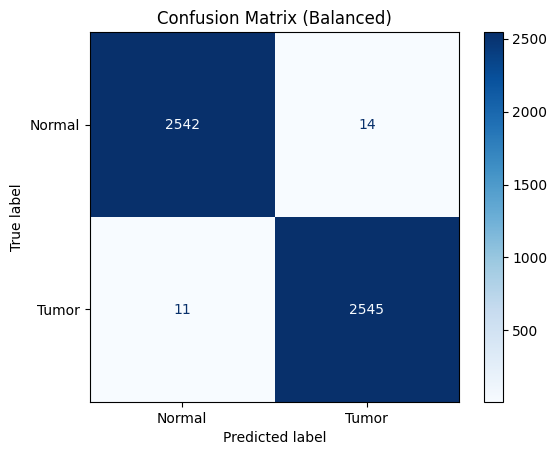

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# =====================
# 7️⃣ Confusion Matrix 시각화
# =====================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Tumor"])

plt.figure(figsize=(5, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Balanced)")
plt.show()
